# Technical Writeup

## Background

As I mentioned in the non-technical Readme file, the goal of the exercise is to predict the probability of a click on ads. The model will be used in real-time when deciding how a Deman-Side Platform (DSP) should respond to ad requests. Depending on the click probability, the DSP would respond with a higher or lower bid. Thus, predicting click probability is the key to the platform's success.

The data set contained 5 million actual records of Ad impressions (shown here as "wins") and the resulting Clicks on Ads. Each record was composed of 77 columns, which represent the parameters of the bid request that the platform can use to decide how to respond to the bid request. The Clicks were shown in the Click TimeStamp. Records (ad impressions) without clicks would have no click timestamp.

## Organization of work

I organized the work into four stages:
1. The initial data cleanup (Book 1)
2. Exploratory Data Analysis (EDA) and more cleanup (Book 2)
3. Data transformation (Book 3)
4. Modeling, which I divided into the following notebooks:
   - Book 4 contains standard Models, such as: 
       - Logistic Regression, 
       - Decision Tree, 
       - Random Forest, 
       - KNN,
       - SVM.
   - Book 5 contained XG Boost models
   - Book 6 Contained CatBoost models

Each of the first 3 notebooks outputted a .csv file, which the next notebook would use. The DataTransformation notebook produced a data set used by all of the Modeling notebooks.

Each of the Modeling notebooks would contribute the summary of the model performance to the “performance_df” data frame, which I would save as a .csv file.

Such modular organization allowed me to re-run and improve upon any of the modeling notebooks independently and without re-running the entire process of clean-up, EDA, and Transformation.


## 1. Initial Data Cleanup:

- Checked for duplicate records. No such records were found.
- Reviewed data types
- Reviewed unique value counts
- Reviewed the absolute counts and % of null values (NaNs) for each column
- Deleted empty fields
- Deleted columns where every (or almost every) value was a unique value. Such columns would not be useful for modeling.
- Converted the Click Timestamp into the "Target" variable: 1 for a click, 0 for no click.

Out of 5,000,000 times the ads were shown, there were only 4,804 clicks, which is a massive class imbalance. So, I under-sampled the non-clicks by 1 to 1,000, thus reducing the number of non-click events to 5,000.


## 2. Exploratory Data Analysis (EDA) and More Cleanup:

- Converted "object" data type to "category."
- Several columns that were numerical (integer or float) type were actually category IDs. I converted them to the "category" type.
- The country column had only two values: US and Peru, with only a handful of records belonging to Peru. Deleted the column
- Some columns had string values like ['2', None, None, None]. I simplified the category IDs.
- I mapped the "prem" and "RON" inventory types to the "Premium” = 1/0 variable.
- Transformed the impression (win) timestamp into two variables: Day of Week and UTC. Because all the events were in the US or Peru, I converted the time to UC Central Time. Defined two variables based on date and time:
    - Weekday = 1/0
    - TOD: Morning, Afternoon, Evening, and Night. Based on my experience, ad performance differed during this period. However, during the subsequent analysis, these variables were not predictive of the outcome.
- Build Cramer's V HeatMap to analyze the association between each Categorical variable and Target and between the independent variables. Based on this analysis:
    - Deleted variables that have no impact on the Target
    - Deleted some of the variables that were essentially duplicative of one another and thus would not add any new information while also having strong Association (to prevent Multicollinearity)
- Build a Correlation Matrix and heat map to analyze the Correlation between each Numerical variable and Target. Based on the analysis:
    - Deleted variables that have no impact on the Target
    - Deleted some of the variables that were essentially duplicative of another and thus would not add any new information while also having a strong Correlation (to prevent Multicollinearity)
- Reviewed the distribution of variables and determined that they needed a log transformation
- Conducted bi-variate analysis to confirm that the remaining variable had a significant impact on the target (were predictive of target)

## 3. Transformation:
- Treated the NaNs:
    - Imputed with Mode for Categorical variables
    - Imputed with Median for Numerical variables
- Attempted Log transformation for the numerical variables
- Chose Quantile transformation for the numerical variables because it produced better distribution than the Log Transformations
- Simplified the column names
- Using the Variance Inflation Factor (VIF) calculations got rid of columns that were similar to two other columns and thus had super high VIF.
- Scaled the numerical columns (except for binary) with Standard Scaler.
- One-hot encoded the categorical variables. The resulting Dataframe now had a total of 247 columns.


## 4. Modeling:
- Created the baseline (dumb classifier) model
- Created the following classifier models
    - Decision Tree
    - Random Forest
    - SVM
    - Logistic Regression
    - KNN
    - XGBoost
    - CatBoost
- Using GridSearchCV, conducted hyperparameter optimization for each model. Given that the goal is to predict click-through rate (probability of click), I used LogLoss as the main optimization metric. However, I also tracked the following:
- Accuracy
- Recall
- Precision
- F1
- ROC AUC

# Results
**The following DataFrame contains the summary of performance of my models**

In [4]:
import pandas as pd
performance_df = pd.read_csv(r"C:\Users\dkaza\Documents\0 Berkeley - ML and AI\0_Capstone\performance_df.csv")
performance_df

,Model Name,Elapsed Time,Accuracy,Precision,Recall,F1 Score,ROC AUC,Log Loss
0,Baseline,0.000967,0.509857,0.000000,0.000000,0.000000,0.500000,16.928931
1,Decision Tree - Basic,0.055700,0.968729,0.972028,0.963939,0.967967,0.968636,0.927700
2,Decision Tree - Optimized,27.064759,0.967369,0.968663,0.964632,0.966644,0.967316,0.127090
3,Random Forest - Basic,0.646206,0.973487,0.974930,0.970874,0.972898,0.973437,0.192965
4,Random Forest - Optimized,190.961700,0.974167,0.978291,0.968793,0.973519,0.974063,0.089496
5,Logistic Regression - Basic,0.110738,0.972128,0.991329,0.951456,0.970984,0.971728,0.078890
6,Logistic Regression - Optimized,236.307246,0.972468,0.991336,0.952150,0.971348,0.972075,0.080955
7,KNN - Basic,0.007982,0.970768,0.972145,0.968100,0.970118,0.970717,0.470134
8,KNN - Optimized,59.846456,0.958192,0.972760,0.941054,0.956644,0.957860,0.236475
9,SVM - Basic,5.061740,0.973148,0.990641,0.954230,0.972095,0.972782,0.087060


**The following graph contains the LogLos performance of the models (the most important metric that I optimized to)**

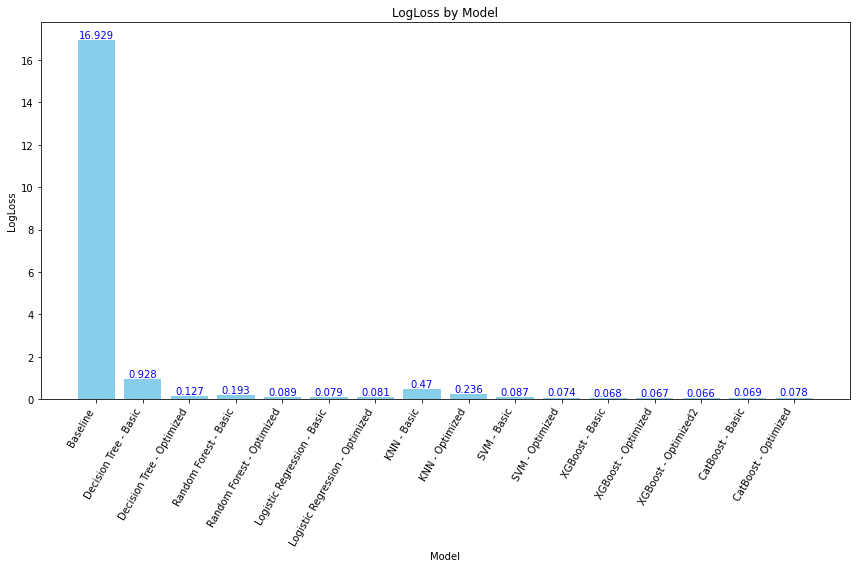

In [5]:
import matplotlib.pyplot as plt
# Plotting the bar graph for LogLoss by Model with annotations
plt.figure(figsize=(12, 8))
bars = plt.bar(performance_df['Model Name'], performance_df['Log Loss'], color='skyblue')

# Adding the text annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center', color='blue')

plt.xlabel('Model')
plt.ylabel('LogLoss')
plt.title('LogLoss by Model')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# Conclusion
This real-world data, such as empty fields, duplicate fields, records with wrong types, etc. Some fields had little impact on the target variable (clicks). Many others had very high Correlations and Associations with other independent variables. Thus, they had to be treated.

After many clean-up and transformation efforts, I produced several decent models. The best, in terms of the key metric (LogLoss), was XGBoost, which I finetuned to achieve a LogLoss of 0.0694, which was 243 times lower than the Dumy Classifier LogLos. It had an overall Accuracy of 0.974, which means that it correctly predicted whether an impression would result in a click 97.4% of the time.

Predictions will happen in real time when the system decides what ads to show users. Thus, simpler models, such as Logistic Regression, could be advantageous. Luckily, Logistic Regression was also one of the best-performing models, with a LogLoss of 0.0789 and an overall Accuracy of 0.972
